In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('prepd-data-0y.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

ID          Name Sex   Age  Height  Weight   Team  NOC  Year  Season  \
0     2      A Lamusi   M  23.0   170.0    60.0  China  CHN  2012  Summer   
1  1464     Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016  Summer   
2  1464     Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016  Summer   
3  4639  Ao Changrong   M  25.0   173.0    71.0  China  CHN  2008  Summer   
4  6376      Ba Dexin   M  23.0   185.0    80.0  China  CHN  2014  Winter   

             City     Sport                                            Event  \
0          London      Judo                     Judo Men's Extra-Lightweight   
1  Rio de Janeiro  Swimming            Swimming Women's 200 metres Freestyle   
2  Rio de Janeiro  Swimming  Swimming Women's 4 x 200 metres Freestyle Relay   
3         Beijing    Hockey                              Hockey Men's Hockey   
4           Sochi   Curling                            Curling Men's Curling   

  Medal Region  
0  None  China  
1  None  China  
2  None  China  
3  None  China  
4  None  China

In [3]:
x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x_std[:10])
print(y[:10])

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

[[ 8.83548237e-01 -5.41633996e-01 -5.36952000e-01 -7.27638710e-01
  -1.00312264e+00 -8.75608274e-03 -4.81363652e-01 -3.77583931e-01
   2.04266259e-01  1.72896428e-01]
 [-1.13180012e+00 -2.17247262e+00 -7.18761771e-01 -1.12091655e+00
  -1.00312264e+00  1.28434326e+00 -4.81363652e-01  4.30643324e-01
   1.17628716e+00  1.25778422e+00]
 [-1.13180012e+00 -2.17247262e+00 -7.18761771e-01 -1.12091655e+00
  -1.00312264e+00  1.28434326e+00 -4.81363652e-01  4.30643324e-01
   1.17628716e+00  1.29065961e+00]
 [ 8.83548237e-01 -1.79225413e-01 -2.64237343e-01 -6.62933586e-03
  -1.00312264e+00 -1.30185543e+00 -4.81363652e-01 -1.18581119e+00
   7.46634728e-02  1.40021041e-01]
 [ 8.83548237e-01 -5.41633996e-01  8.26621284e-01  5.83287425e-01
  -1.00312264e+00  6.37793590e-01  2.07743147e+00  1.23887058e+00
  -6.38151852e-01 -5.66799795e-01]
 [-1.13180012e+00 -1.26645116e+00 -1.08238131e+00 -7.93185017e-01
  -1.00312264e+00 -8.75608274e-03 -4.81363652e-01 -3.77583931e-01
   1.17628716e+00  1.23312768e+00

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
df = pd.DataFrame(x_std, columns=['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event'])
df['Medal'] = y
df.head()

Sex       Age    Height    Weight       NOC      Year    Season  \
0  0.883548 -0.541634 -0.536952 -0.727639 -1.003123 -0.008756 -0.481364   
1 -1.131800 -2.172473 -0.718762 -1.120917 -1.003123  1.284343 -0.481364   
2 -1.131800 -2.172473 -0.718762 -1.120917 -1.003123  1.284343 -0.481364   
3  0.883548 -0.179225 -0.264237 -0.006629 -1.003123 -1.301855 -0.481364   
4  0.883548 -0.541634  0.826621  0.583287 -1.003123  0.637794  2.077431   

       City     Sport     Event  Medal  
0 -0.377584  0.204266  0.172896      2  
1  0.430643  1.176287  1.257784      2  
2  0.430643  1.176287  1.290660      2  
3 -1.185811  0.074663  0.140021      2  
4  1.238871 -0.638152 -0.566800      2

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


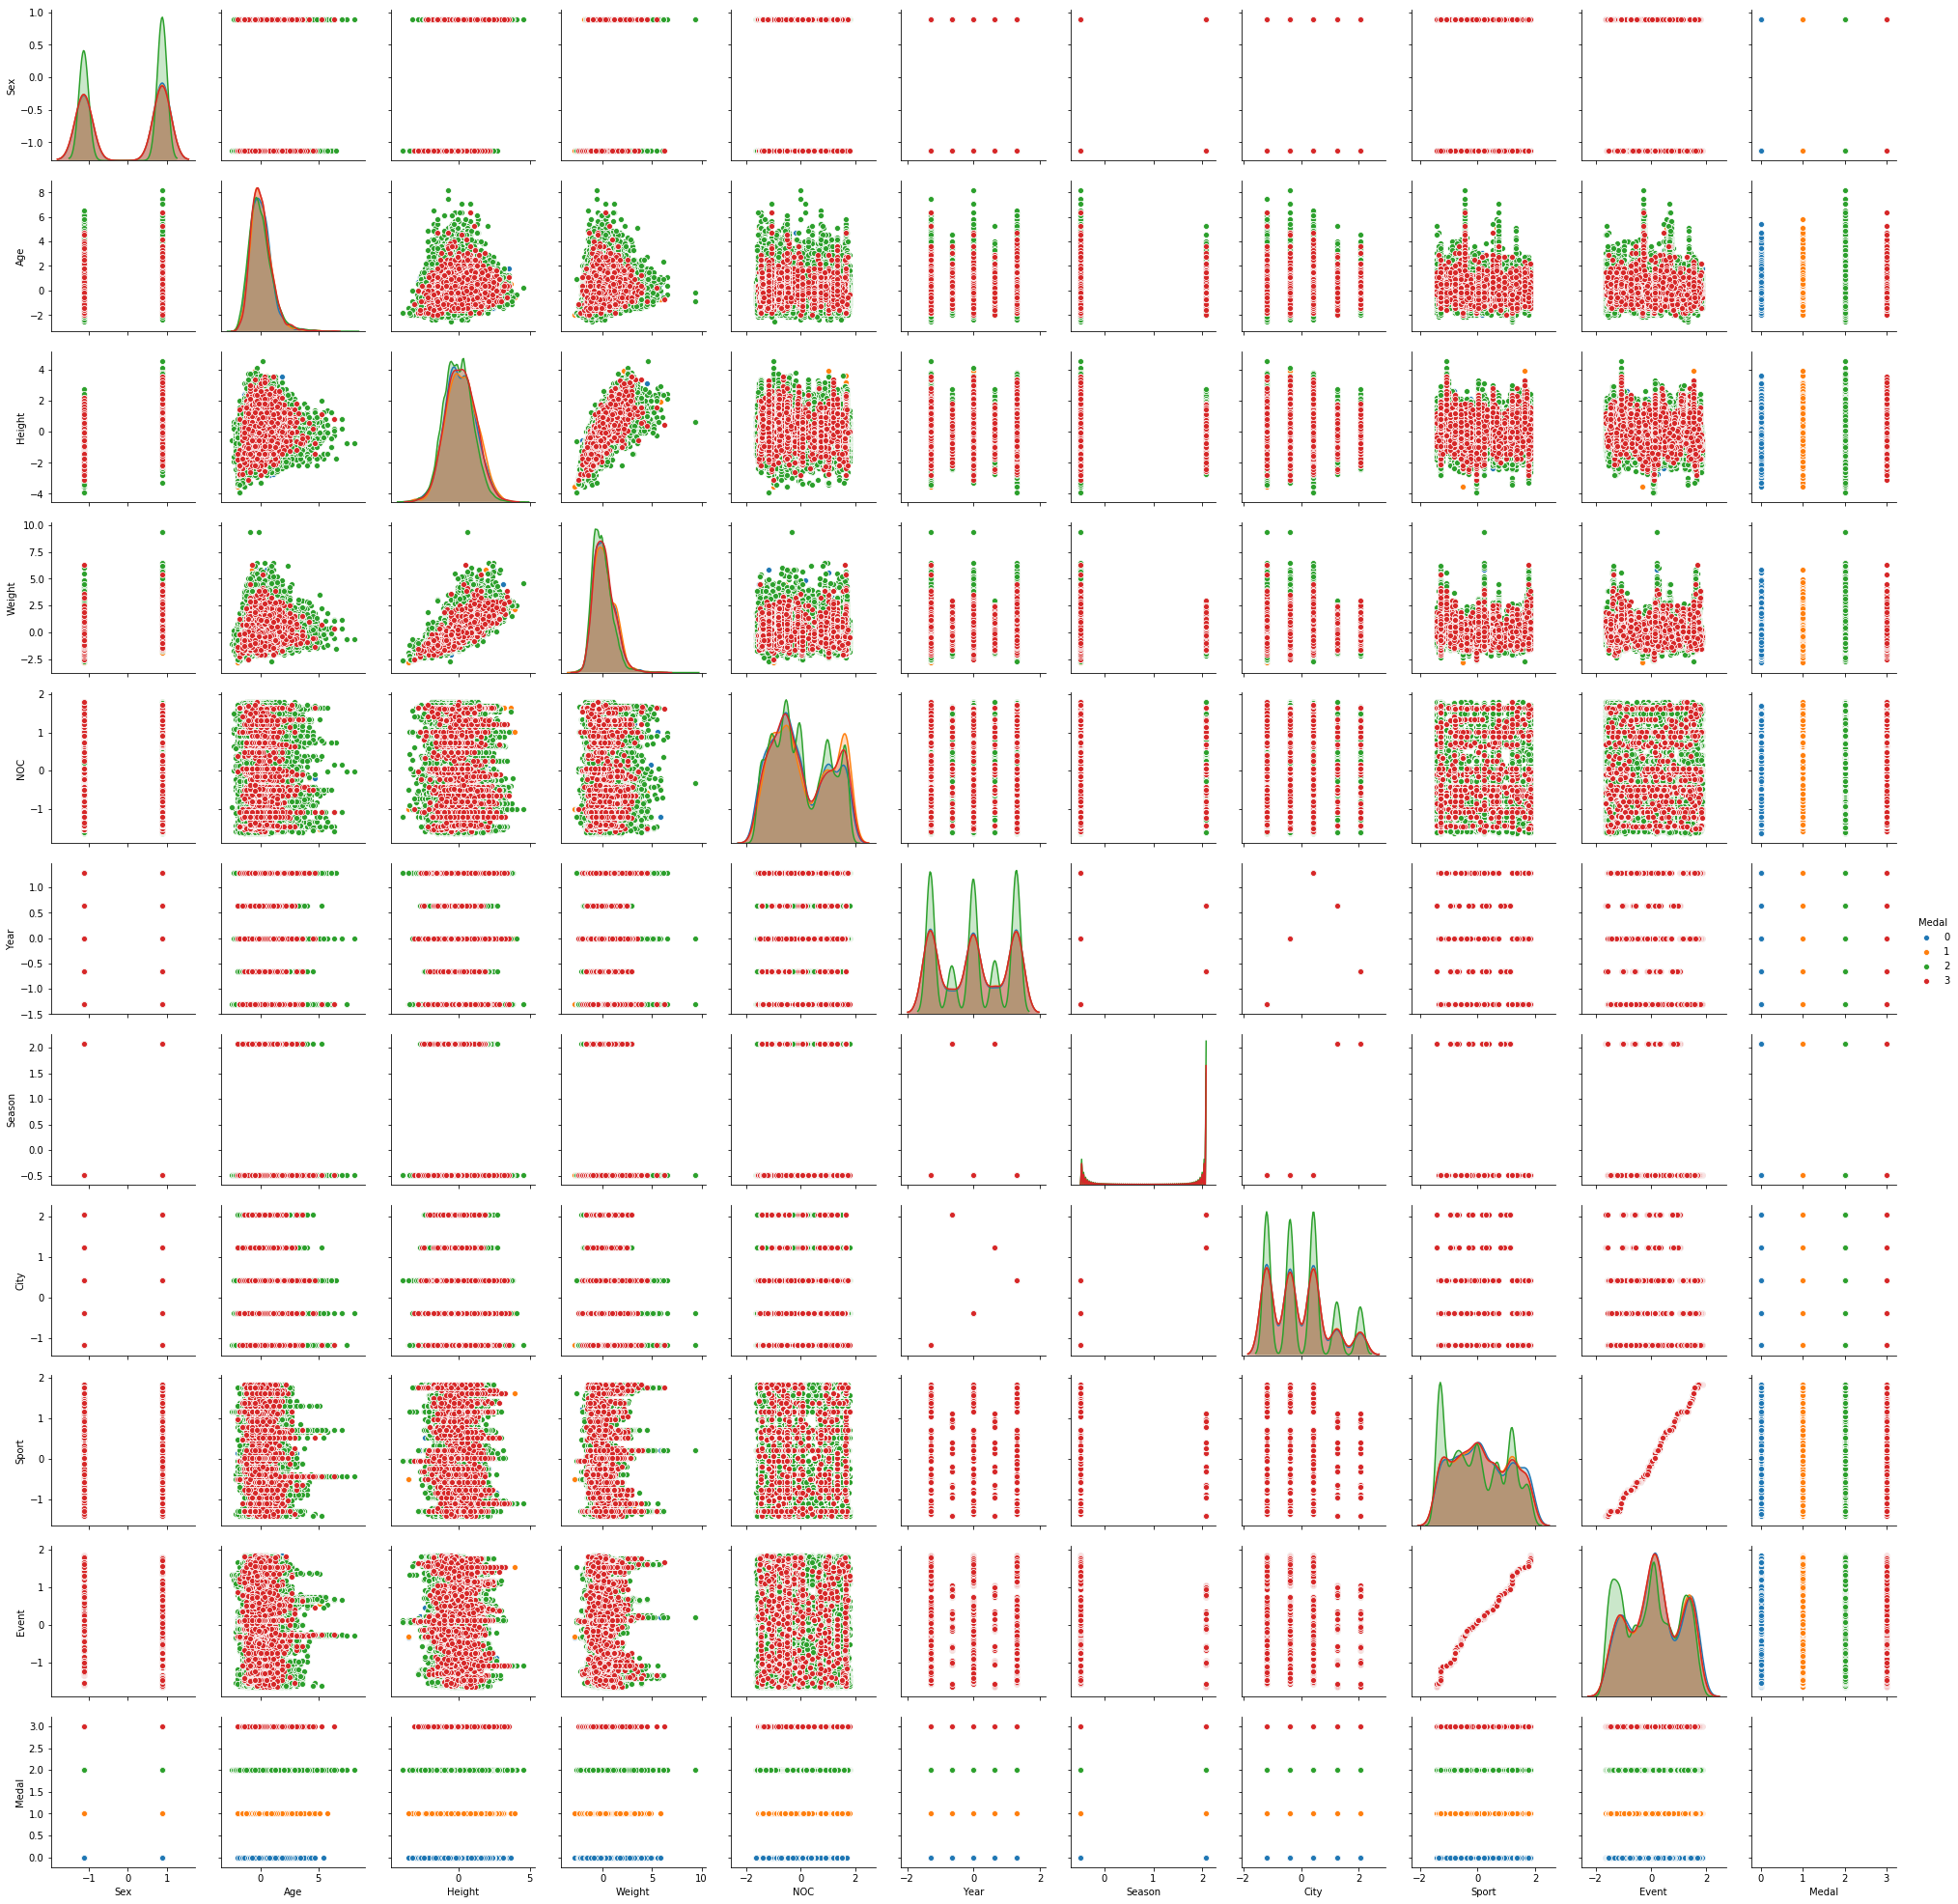

In [5]:
sb.pairplot(df, hue='Medal')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


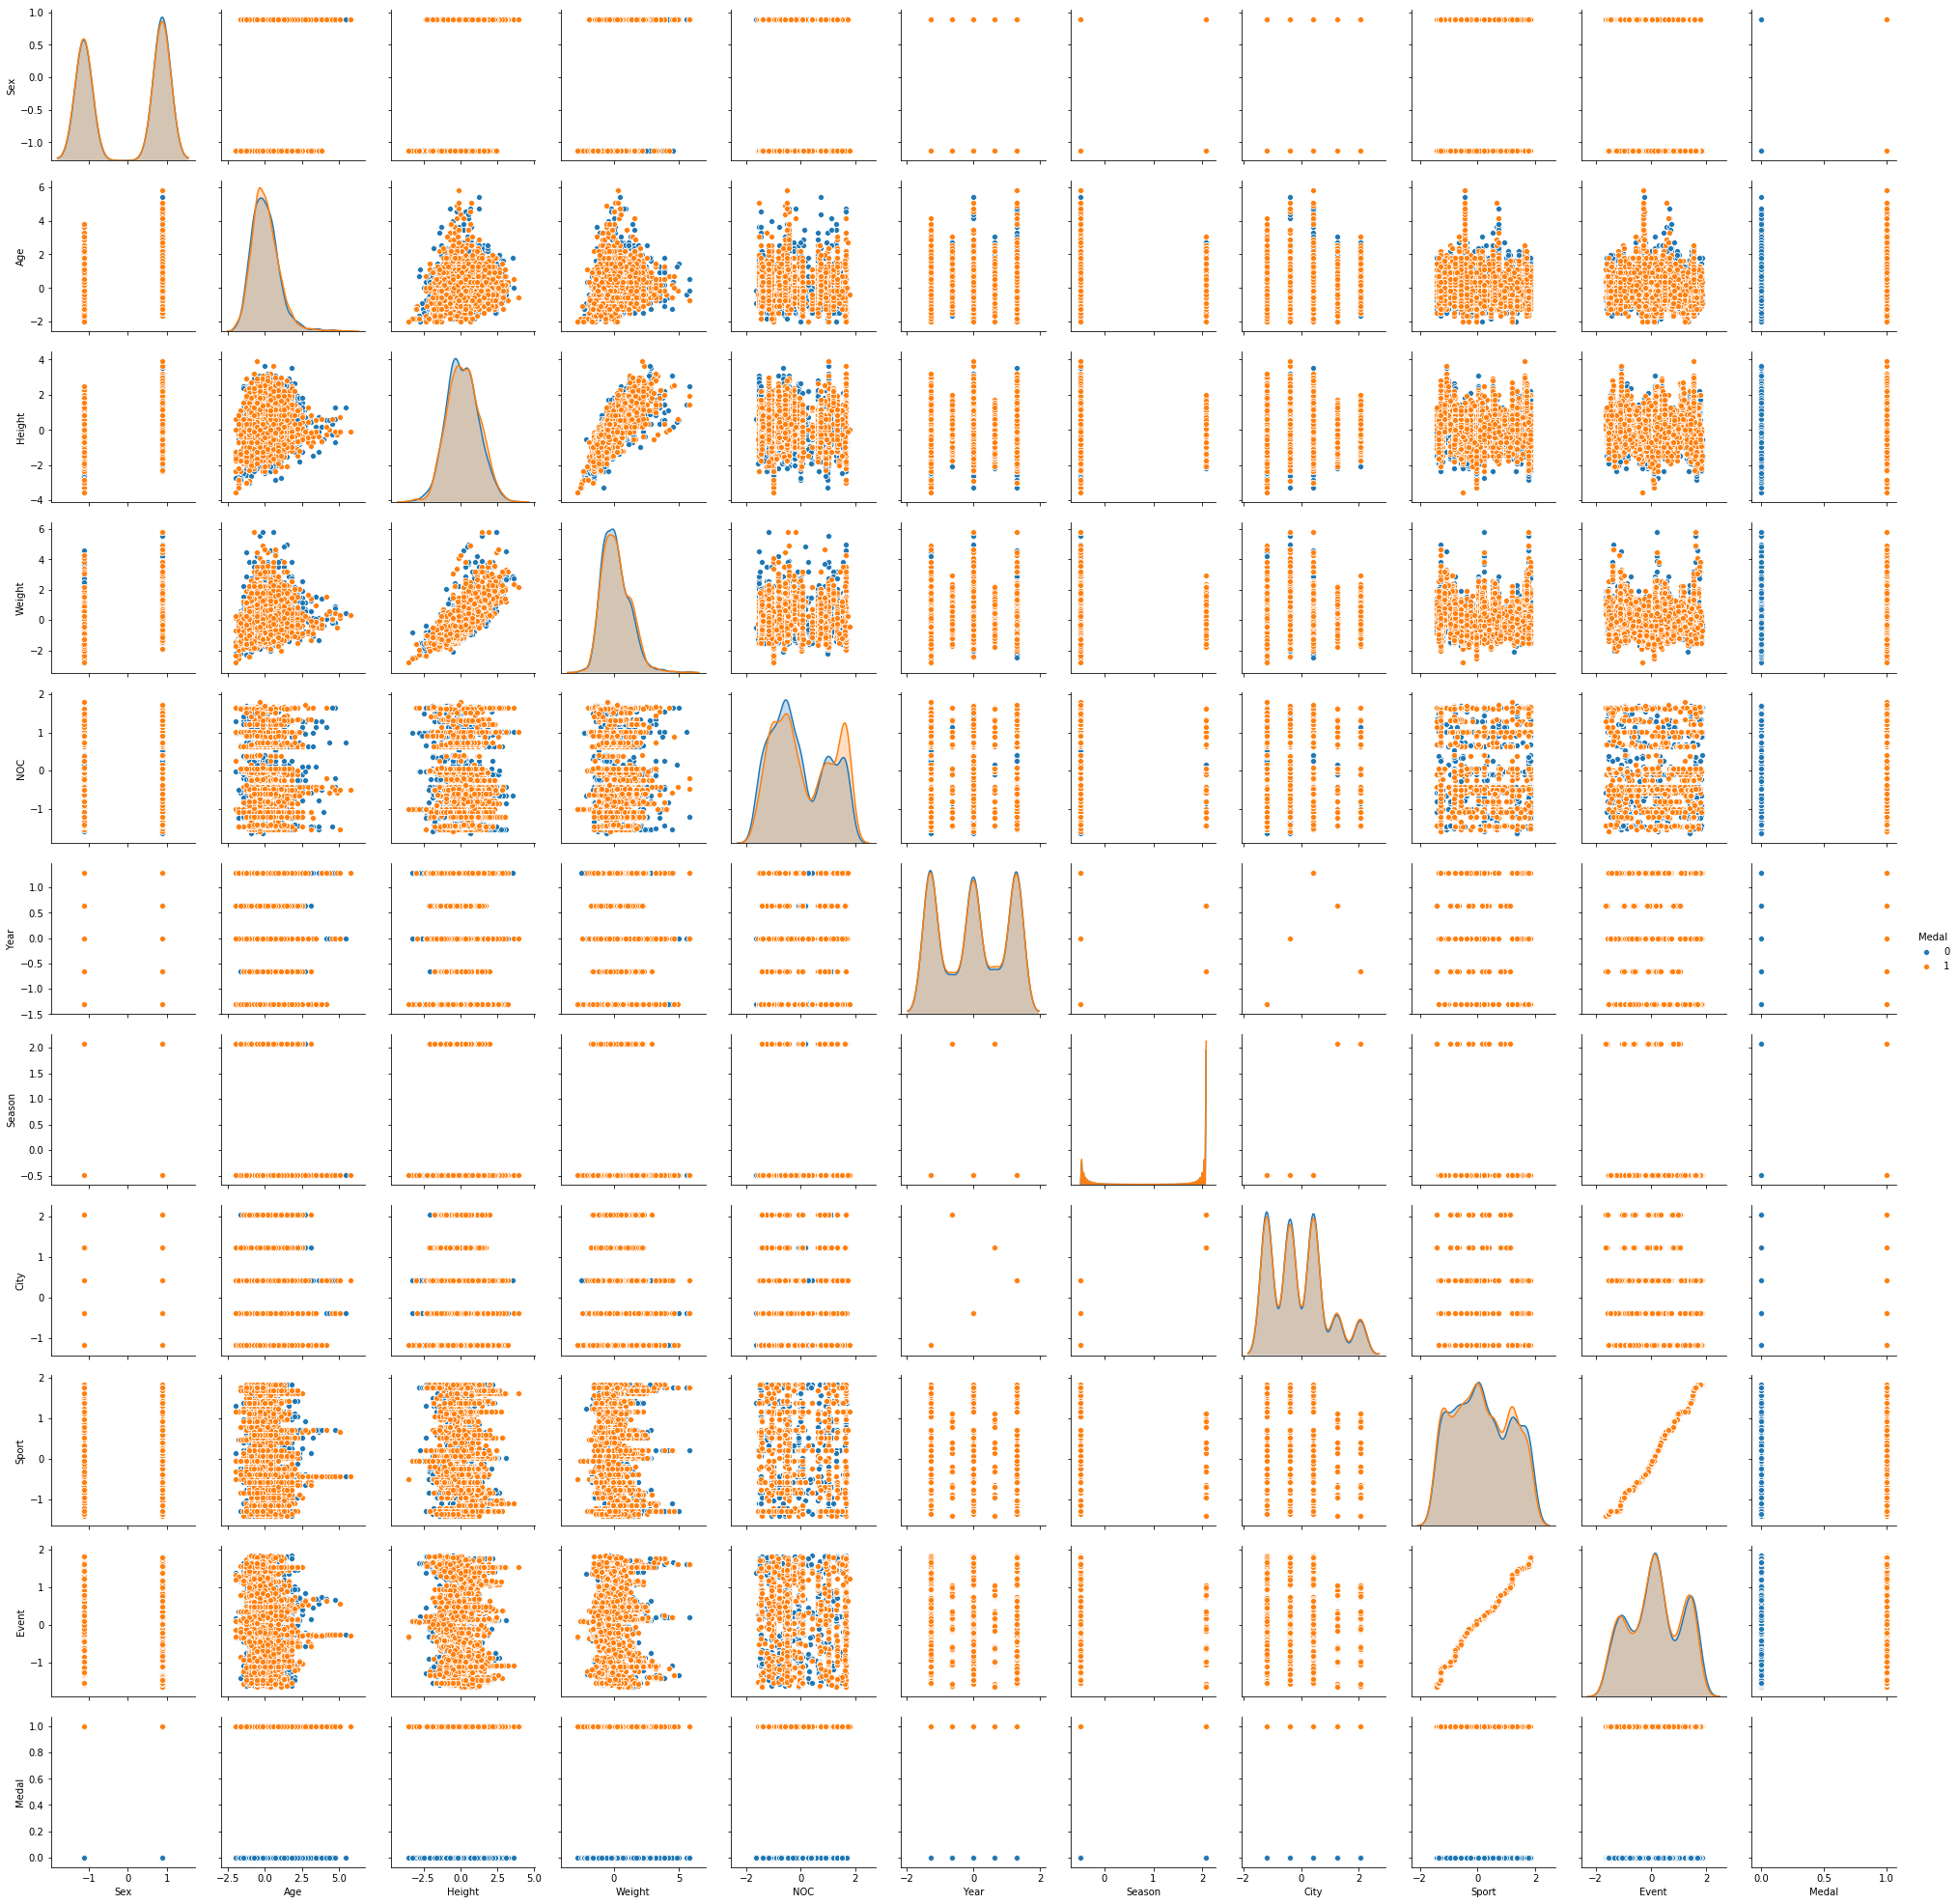

In [6]:
sb.pairplot(df.loc[~df.Medal.isin([2,3])], hue='Medal')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


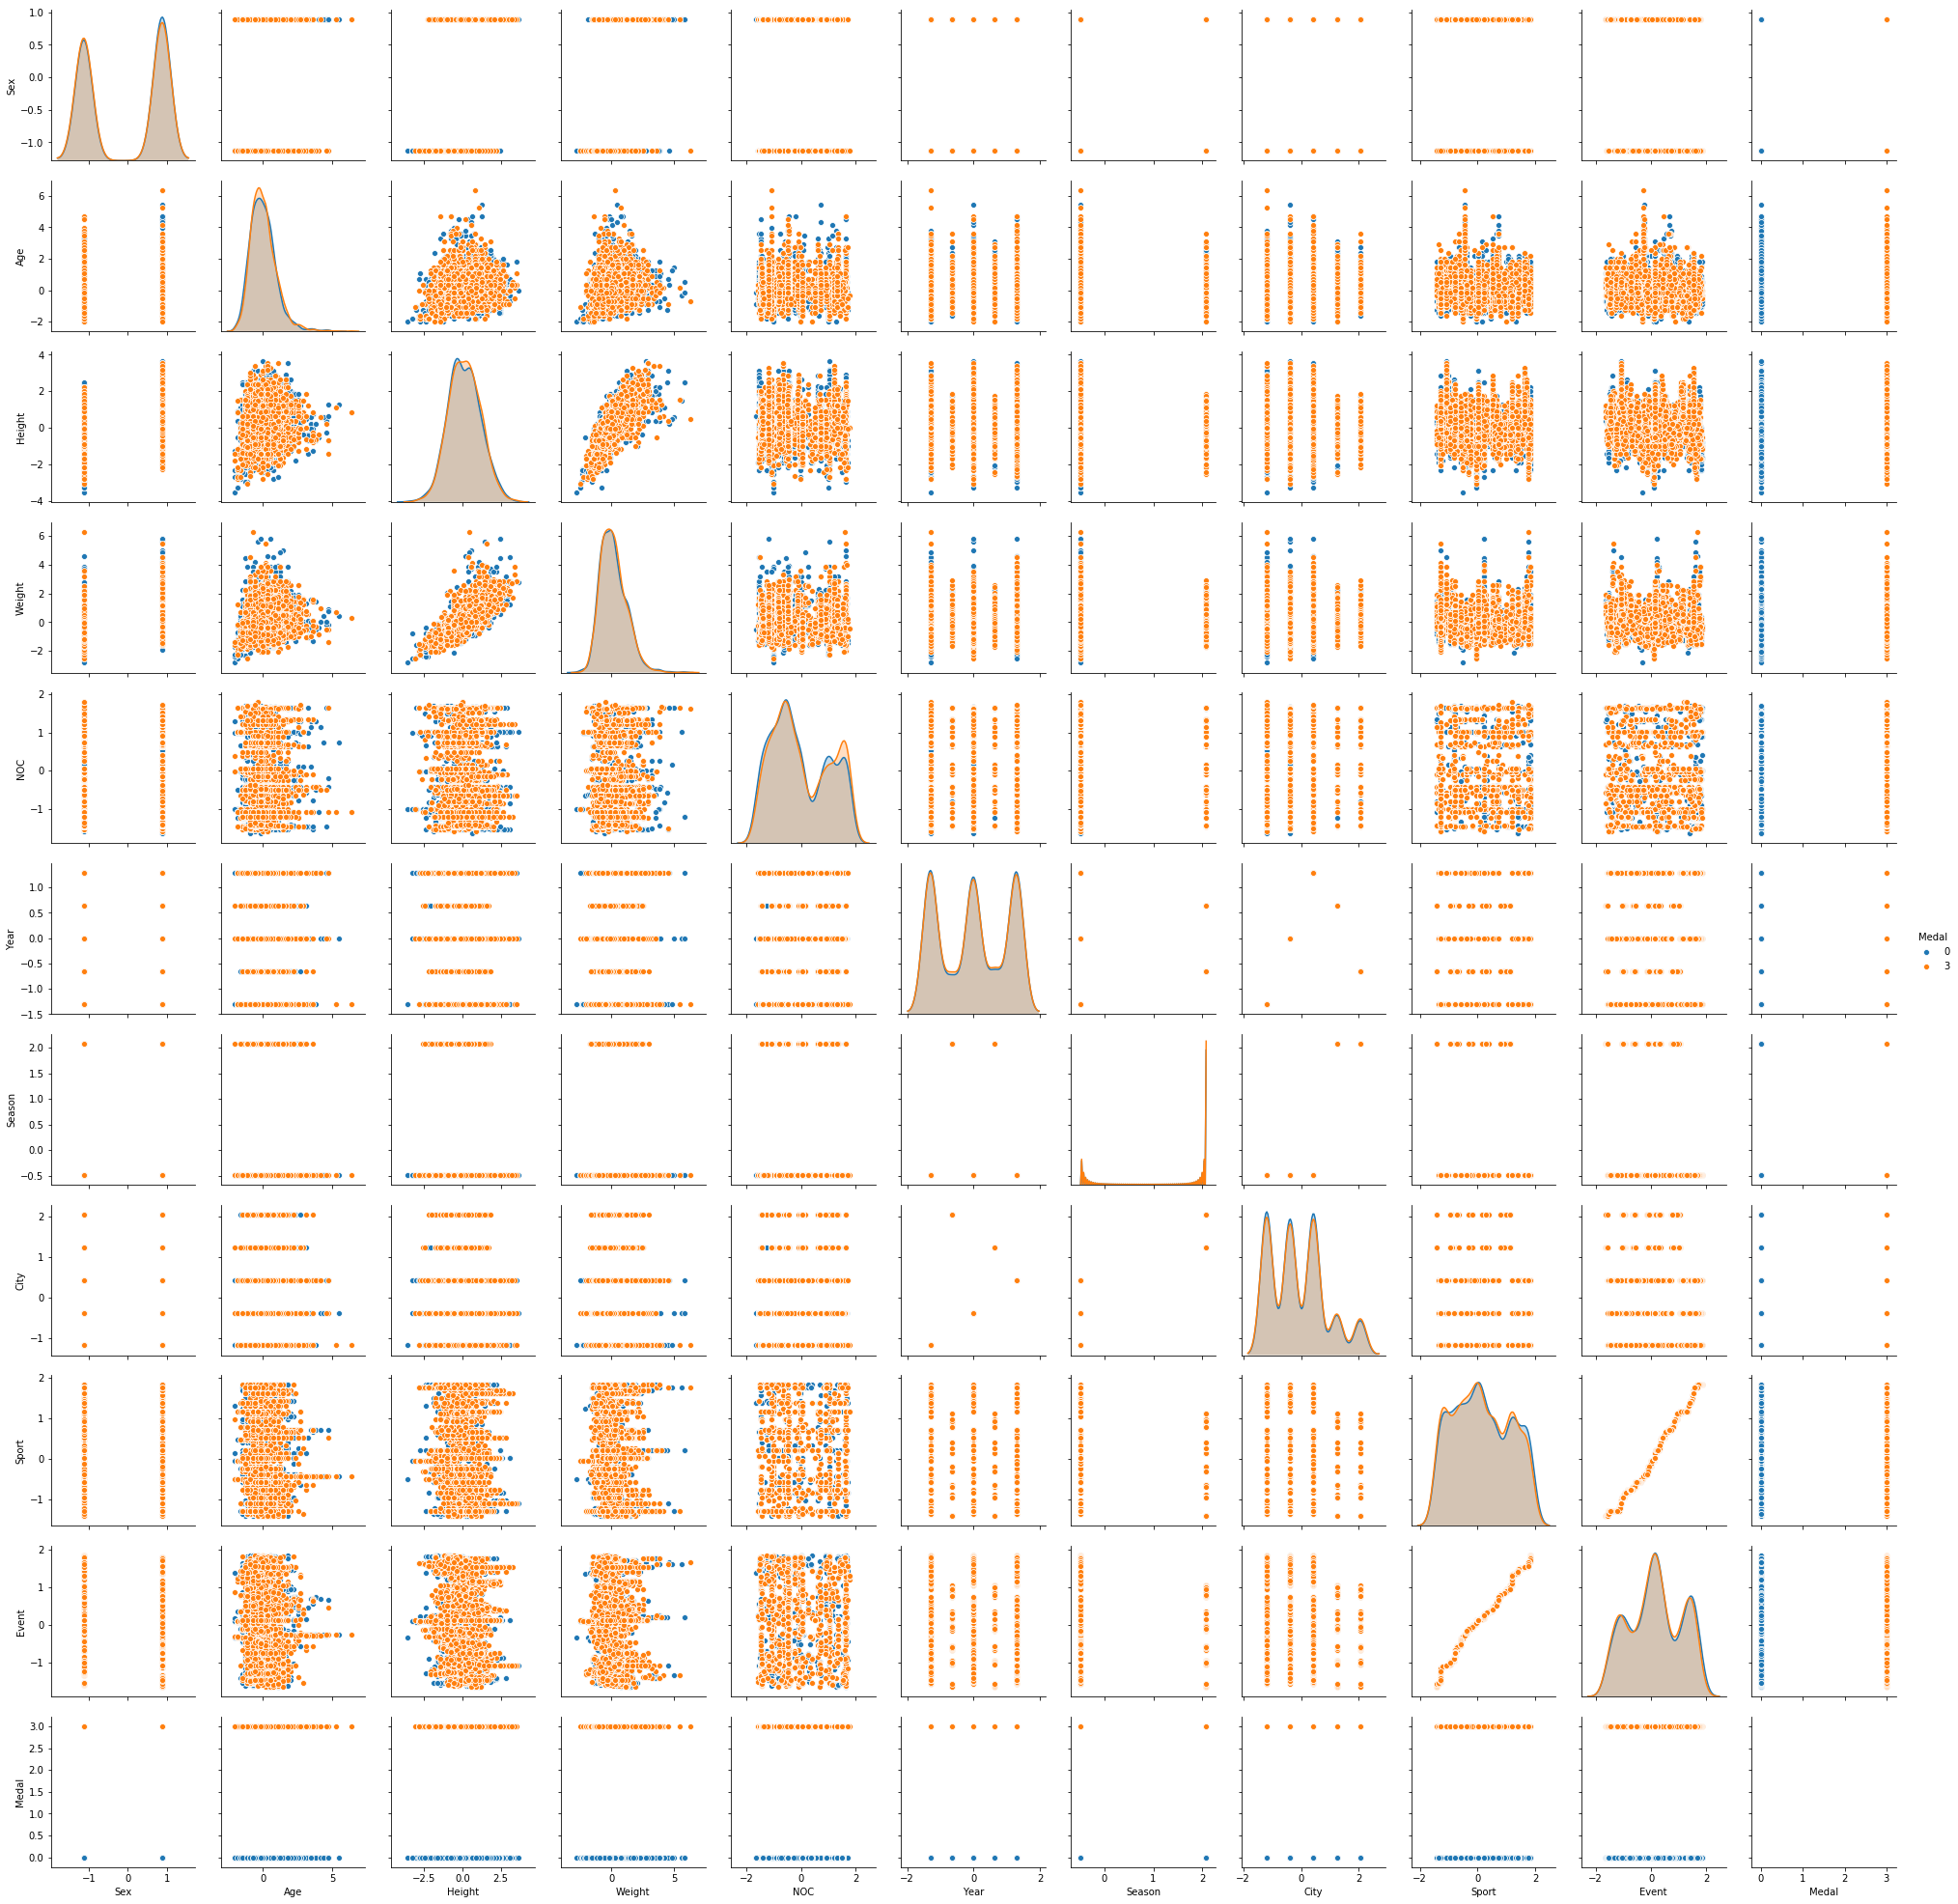

In [7]:
sb.pairplot(df.loc[~df.Medal.isin([2,1])], hue='Medal')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


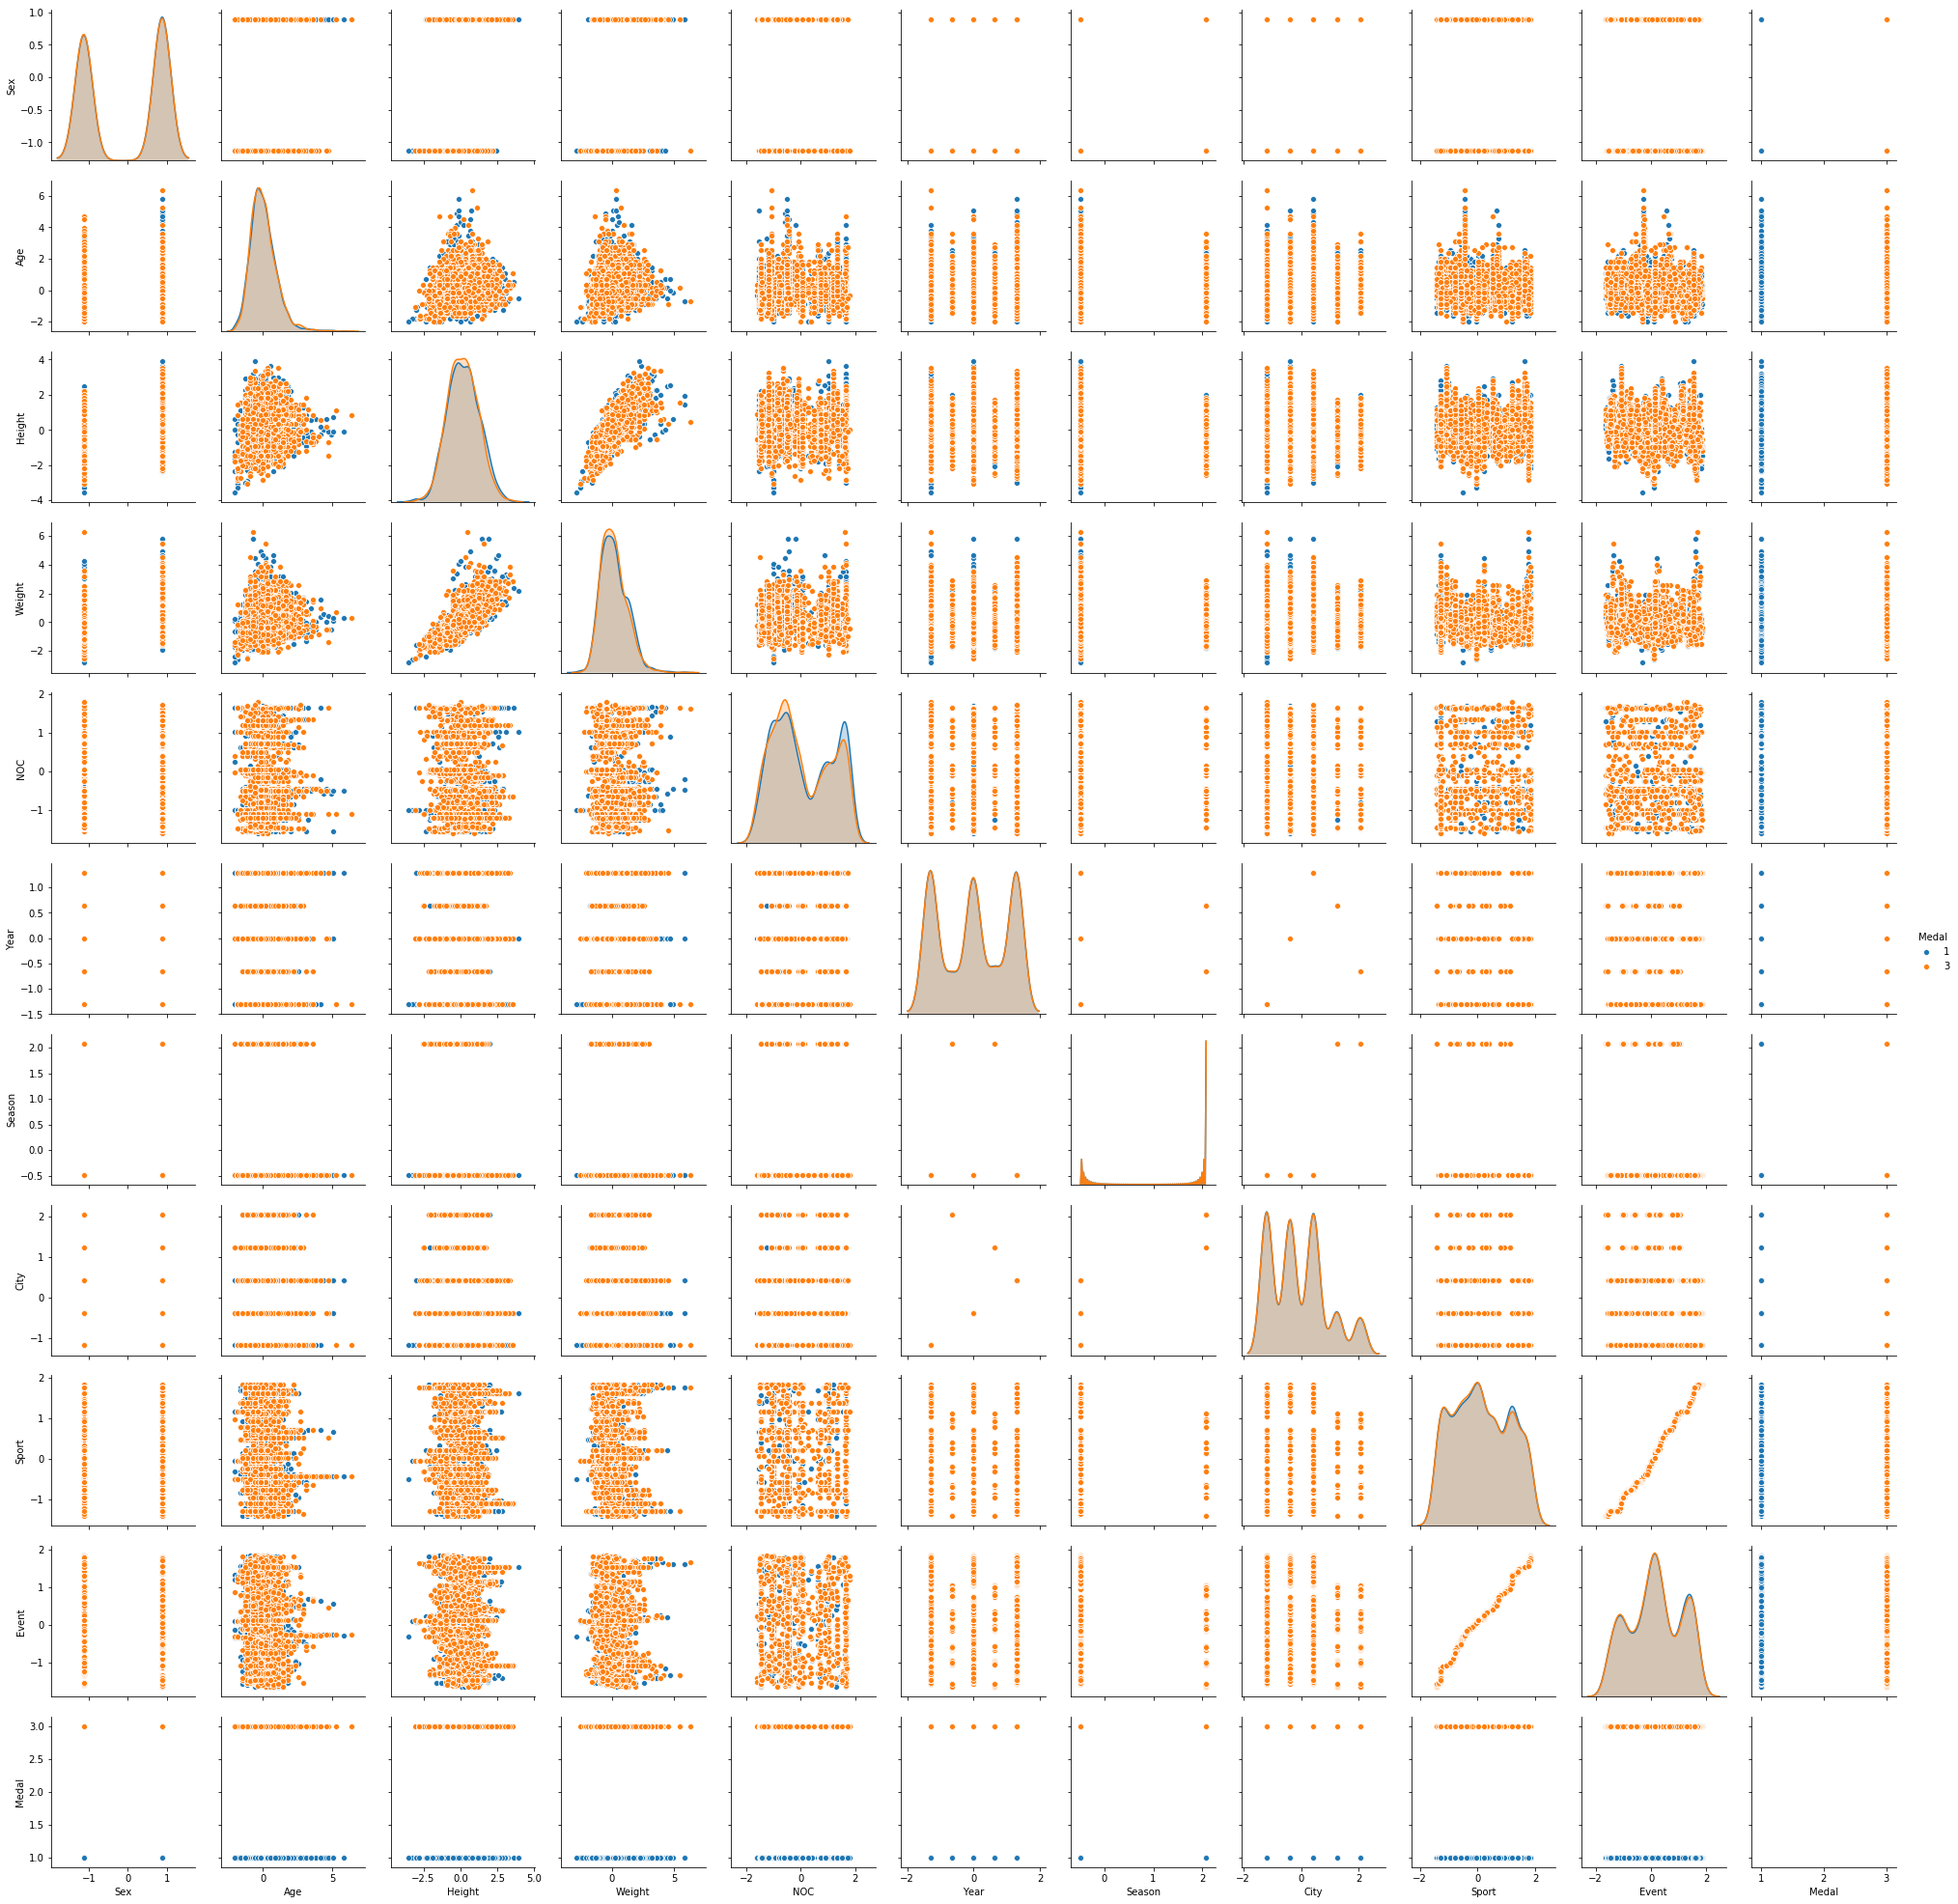

In [8]:
sb.pairplot(df.loc[~df.Medal.isin([2,0])], hue='Medal')

In [9]:
df_temp = df.loc[~df.Medal.isin([2,3])]

x = df_temp[['Sport', 'NOC']].values
y = df_temp['Medal'].values

print(x[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

[[-1.22136439 -1.00312264]
 [ 1.75949969 -1.00312264]
 [-0.50854907 -1.00312264]
 [-0.50854907 -1.00312264]
 [-0.50854907 -1.00312264]
 [-0.50854907 -1.00312264]
 [-0.50854907 -1.00312264]
 [ 0.7874788  -1.00312264]
 [-1.28616578 -1.00312264]
 [-1.22136439 -1.00312264]]
[1 1 1 1 0 1 1 0 1 0]


In [10]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
#     x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [11]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
        
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    #plot decision boundaries and margins
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,-1],
                   s=300,linewidth=1,facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [12]:
from sklearn.svm import SVC
from sklearn.svm import SVR

c = np.array([0.01, 1.0, 100])
gamma = np.array([0.01, 1.0, 100])

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Accuracy: 0.547


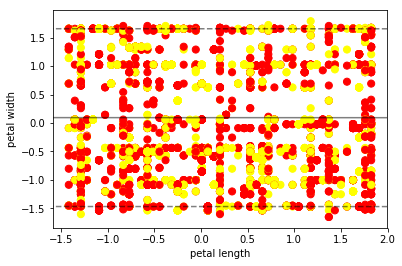

CPU times: user 1.17 s, sys: 183 ms, total: 1.35 s
Wall time: 749 ms


In [13]:
%%time
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
# print(dir(svm))
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [14]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c))
grid.fit(x, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

param_C  mean_fit_time  mean_score_time  mean_train_score  mean_test_score  \
0    0.01       0.138790         0.029200          0.544271            0.495   
1       1       0.201672         0.032774          0.543854            0.495   
2     100       7.122989         0.027755          0.543854            0.495   

   rank_test_score  
0                1  
1                1  
2                1

Accuracy: 0.551


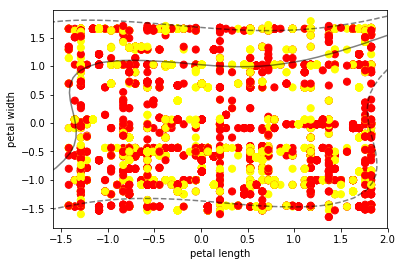

CPU times: user 1.25 s, sys: 166 ms, total: 1.41 s
Wall time: 785 ms


In [15]:
%%time
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [ ]:
# grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
# grid.fit(x, y)
# grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
# grid_data.head(10)

Accuracy: 0.533


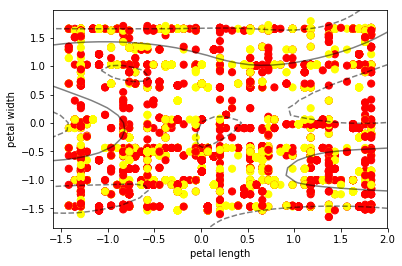

CPU times: user 1.34 s, sys: 231 ms, total: 1.57 s
Wall time: 858 ms


In [14]:
%%time
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [ ]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

Accuracy: 0.467


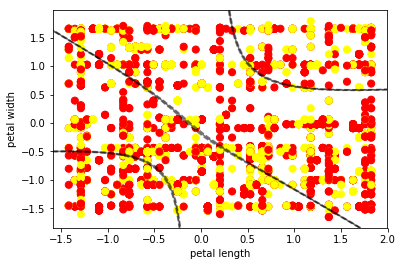

CPU times: user 1.24 s, sys: 180 ms, total: 1.42 s
Wall time: 754 ms


In [15]:
%%time
svm = SVC(kernel='sigmoid')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [ ]:
# grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
# grid.fit(x, y)
# grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
# grid_data.head(10)

In [16]:
corrmatrix = df.corr()
corrmatrix.head()

Sex       Age    Height    Weight       NOC      Year    Season  \
Sex     1.000000  0.120544  0.544310  0.547660 -0.012520 -0.018536  0.021311   
Age     0.120544  1.000000  0.126089  0.167862 -0.001015  0.028985  0.005505   
Height  0.544310  0.126089  1.000000  0.785515 -0.004320 -0.007825 -0.045512   
Weight  0.547660  0.167862  0.785515  1.000000  0.005426 -0.011115 -0.012404   
NOC    -0.012520 -0.001015 -0.004320  0.005426  1.000000 -0.008066  0.053743   

            City     Sport     Event     Medal  
Sex     0.003977 -0.006184 -0.042762  0.006285  
Age     0.024253 -0.081850 -0.083435 -0.003527  
Height -0.039356  0.055902  0.025200 -0.032230  
Weight -0.016221  0.072756  0.041362 -0.033834  
NOC     0.036639 -0.013732 -0.014792 -0.000350

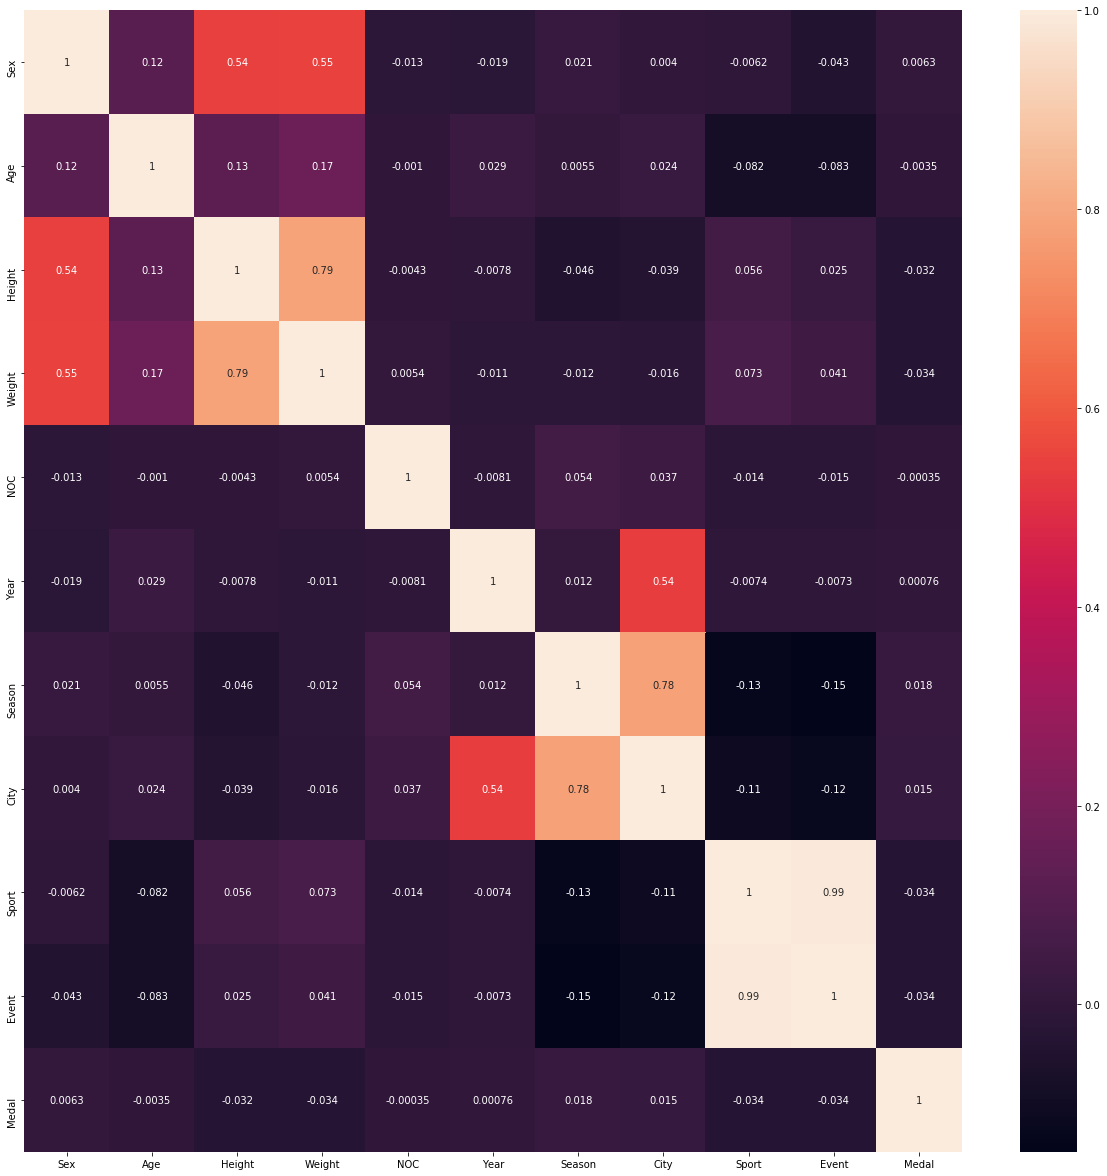

In [18]:
f = plt.subplots(figsize=(21,21))
sb.heatmap(corrmatrix, annot=True)

In [22]:
x = df[['Height']].values
y = df['Weight'].values

sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.3)

In [23]:
%%time
svm = SVR(kernel='linear')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 0.601
CPU times: user 27.7 s, sys: 272 ms, total: 28 s
Wall time: 28.2 s


In [ ]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

In [24]:
%%time
svm = SVR(kernel='poly')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 0.275
CPU times: user 4min 3s, sys: 785 ms, total: 4min 4s
Wall time: 4min 5s


In [ ]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

In [25]:
%%time
svm = SVR(kernel='rbf')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 0.606
CPU times: user 36 s, sys: 206 ms, total: 36.2 s
Wall time: 36.3 s


In [ ]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

In [26]:
%%time
svm = SVR(kernel='sigmoid')
svm.fit(x_train, y_train)
# print(dir(svm))
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: -3077507.389
CPU times: user 51.1 s, sys: 222 ms, total: 51.3 s
Wall time: 51.4 s


In [ ]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

In [28]:
x = df.iloc[:, :-1]
y = df['Medal'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [29]:
%%time
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 0.856
CPU times: user 2min 11s, sys: 979 ms, total: 2min 12s
Wall time: 2min 13s


In [30]:
%%time
svm = SVR(kernel='rbf')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 0.005
CPU times: user 23.7 s, sys: 150 ms, total: 23.9 s
Wall time: 23.9 s
